# YOLO

YOLO (You Only Look Once), a popular object detection and image segmentation model, was developed by Joseph Redmon and Ali Farhadi at the University of Washington. Launched in 2015, YOLO quickly gained popularity for its high speed and accuracy.Official link https://docs.ultralytics.com/#where-to-start


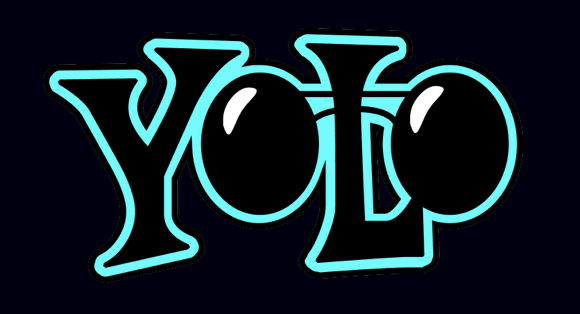



In [ ]:
# 3. Install Ultralytics ###
!pip install ultralytics -q
!pip install pyyaml -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.1/910.1 kB 30.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import re
import requests

from ultralytics import YOLO

##Create yaml file

In [ ]:
import yaml

file_path = '/content/drive/MyDrive/Work_space/Kaushi/Kids_and_Adults_detection/artifact/children_and_adults/data1.yaml'

with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

print(data)

{'path': '/content/drive/MyDrive/KidzCare/data0', 'train': 'images/train', 'val': 'images/val', 'nc': 2, 'names': {0: 'Kid', 1: 'Adult'}}


In [ ]:
classes=data["names"]
print(classes)

{0: 'Kid', 1: 'Adult'}


In [ ]:
%%writefile '/content/drive/MyDrive/Work_space/Kaushi/Kids_and_Adults_detection/artifact/children_and_adults/kidsAdults_yolo_config.yaml'

path: '/content/drive/MyDrive/Work_space/Kaushi/Kids_and_Adults_detection/artifact/children_and_adults'# dataset root dir
train: images/train  # train images (relative to 'path')
val: images/val  # val images (relative to 'path')

names:
  0: "Kid"
  1: "Adult"


Writing /content/drive/MyDrive/Work_space/Kaushi/Kids_and_Adults_detection/artifact/children_and_adults/kidsAdults_yolo_config.yaml


##Train model

**Use this link to choose the pre trained model**
 [Ultralytics YOLO Docs](https://docs.ultralytics.com/models/yolov8/)

In [ ]:


# Load a model
model = YOLO("yolov8n.pt")  # load pre trained model

# Use the model
results = model.train(data="/content/drive/MyDrive/Work_space/Kaushi/Kids_and_Adults_detection/artifact/children_and_adults/kidsAdults_yolo_config.yaml",
                      epochs=5,imgsz=640,batch=0.6)  # train the model

Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Work_space/Kaushi/Kids_and_Adults_detection/artifact/children_and_adults/kidsAdults_yolo_config.yaml, epochs=5, time=None, patience=100, batch=0.6, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

train: Scanning /content/drive/MyDrive/Work_space/Kaushi/Kids_and_Adults_detection/artifact/children_and_adults/labels/train.cache... 428 images, 3 backgrounds, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 14.58G reserved, 0.08G allocated, 0.08G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     3011238       8.195         0.482          22.7         15.21        (1, 3, 640, 640)                    list
     3011238       16.39         0.549         28.33         14.61        (2, 3, 640, 640)                    list
     3011238       32.78         0.791         24.32         16.64        (4, 3, 640, 640)                    list
     3011238       65.56         1.267         28.95         23.12        (8, 3, 640, 640)                    list
     3011238       131.1         2.240         40.18         44.67       (16, 3, 640, 640)                    list
AutoBatch: WARNING ⚠️ batch=0 outside safe range, using default batch-size 16.
AutoBatch: Using batch-size 16 for CUDA:0 16.63G/14.75G (113%) ✅


train: Scanning /content/drive/MyDrive/Work_space/Kaushi/Kids_and_Adults_detection/artifact/children_and_adults/labels/train.cache... 428 images, 3 backgrounds, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Work_space/Kaushi/Kids_and_Adults_detection/artifact/children_and_adults/labels/val.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.24G      1.176      2.173      1.298         61        640: 100%|██████████| 27/27 [00:17<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all         80        184      0.522      0.824      0.627      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.29G      1.167      1.452      1.303         70        640: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         80        184      0.743      0.794      0.833      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.29G      1.165       1.33      1.272         74        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         80        184      0.781      0.799      0.856      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.29G      1.136      1.235       1.26         60        640: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         80        184      0.768      0.844      0.869      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.29G      1.065      1.113      1.223         71        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         80        184      0.881      0.882       0.94       0.66



5 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]


                   all         80        184      0.881      0.882      0.941       0.66
                   Kid         80        130      0.963      0.808      0.948      0.651
                 Adult         54         54      0.799      0.956      0.934      0.669
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/train3


## Validation Metrics

*Class*: The specific class or category of objects being evaluated.

*Images*: The number of images used for validation.

*Instances*: The total number of object instances across all validation images.

The metrics for all classes combined (all) and for individual classes (1 and 2) are as follows:

### **All Classes**
*Images*: The number of images used in validation.

*Instances*: The total number of object instances detected across all images.

*P (Precision)*: The precision score, which measures the proportion of true positive detections out of all positive detections.

*R (Recall)*: The recall score, which measures the proportion of true positive detections out of all actual positives.

*mAP50*: The mean Average Precision at IoU threshold 0.5, a metric for evaluating object detection performance.

*mAP50-95*: The mean Average Precision averaged over IoU thresholds from 0.5 to 0.95.

In [ ]:
### 5. Copy and save results in drive ###
import subprocess

# Set environment variables and run the scp command

command = "scp -r /content/runs/detect/train3 '/content/drive/MyDrive/Work_space/Kaushi/Kids_and_Adults_detection/artifact'"
process = subprocess.Popen(command, shell=True, env={"LC_ALL": "C.UTF-8", "LANG": "C.UTF-8"})
process.wait()


## Model inference

In [ ]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.pt")  # pretrained YOLOv8n model
#model = YOLO("yolov8n.pt")
model_path="/content/drive/MyDrive/Work_space/Kaushi/Kids_and_Adults_detection/artifact/model/weights/best.pt"

# Load a model
model = YOLO(model_path)  # load a custom model


0: 448x640 1 Kid, 1 Adult, 171.9ms
Speed: 5.0ms preprocess, 171.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
[[67.88656616210938, 4.023284912109375, 198.50244140625, 181.0951690673828, 0.5149216651916504, 1.0], [114.38128662109375, 45.50105285644531, 209.52386474609375, 181.00914001464844, 0.42960605025291443, 0.0]]


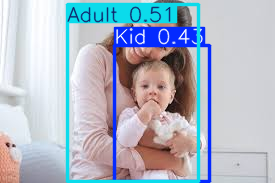

In [ ]:
# Run batched inference on a list of images
results = model(["https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjqnAxyuRoWUa4RnziaeF-DwLP-tIP0_S98w&s",
                 ])  # return a generator of Results objects


# Process results generator
for result in results:
    predict_out = result.boxes.data.tolist()
    print(predict_out)  # Boxes object for bounding box outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

In [ ]:
urls = [
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ09q9-SnHjARL2_h4WNFz9m_pFT346kN395w&s",
    "https://www.ctbehavioralhealth.com/wp-content/uploads/2017/10/child-adult-evaluation.jpg",
    "https://prudential.scene7.com/is/image/prudential/gifting-money-to-adult-children?$pruImageComponent$",
    "https://wp.en.aleteia.org/wp-content/uploads/sites/2/2018/06/web3-child-swing-mother-fun-smile-laugh-shutterstock.jpg?resize=620,350&q=75"
]


for url in urls:
    # Predict results
    results = model([url])  # return a generator of Results objects

    # Process results generator
    for result in results:
        predict_out = result.boxes.data.tolist()
        print(predict_out)  # Boxes object for bounding box outputs
        result.show()  # display to screen
        result.save(filename="result.jpg")

Output hidden; open in https://colab.research.google.com to view.